# Exploratory Data Analysis - Retail Dataset

### 1- Exploring the Data

#### Loading required libraries and dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
warnings.filterwarnings('ignore')
%matplotlib inline

#### Loading the dataset

In [2]:
features_data = pd.read_csv("data/features.csv")
sales_data = pd.read_csv("data/sales.csv")
stores_data = pd.read_csv("data/stores.csv")

#### Exploring the dataset

In [3]:
print("Rows and Columns: ",features_data.shape)
features_data.head()

Rows and Columns:  (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features_cols = list(features_data.columns)
print("The dataset contains {} columns: ".format(len(features_cols)))
features_cols

The dataset contains 12 columns: 


['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday']

In [5]:
print("Rows and Columns: ",sales_data.shape)
sales_data.head()

Rows and Columns:  (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
sales_cols = list(sales_data.columns)
print("The dataset contains {} columns: ".format(len(sales_cols)))
sales_cols

The dataset contains 5 columns: 


['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

In [7]:
print('Range of Dept attribute is {}-{}'.format(sales_data['Dept'].min(),sales_data['Dept'].max()))

Range of Dept attribute is 1-99


In [8]:
print("Rows and Columns: ",stores_data.shape)
stores_data.head()

Rows and Columns:  (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
stores_cols = list(stores_data.columns)
print("The dataset contains {} columns: ".format(len(stores_cols)))
stores_cols

The dataset contains 3 columns: 


['Store', 'Type', 'Size']

In [10]:
print('Range of Store attribute is {}-{}'.format(stores_data['Store'].min(),stores_data['Store'].max()))

Range of Store attribute is 1-45


In [11]:
print('Range of Size attribute is {}-{}'.format(stores_data['Size'].min(),stores_data['Size'].max()))


Range of Size attribute is 34875-219622


In [12]:
types_of_stores = list(stores_data['Type'].unique())
print("There are {} types of stores: {}".format(len(types_of_stores), types_of_stores))

There are 3 types of stores: ['A', 'B', 'C']


#### Understanding of the Data

#### Features sub-dataset

- Store: The id of store ranging from 1 to 45.
- Date: The date of week when the observation was recorded.
- Temperature: Weekly temperature (Fahrenheit) of the region where the particular store is located.
- Fuel_Price: Price of fuel (weekly) in the region where the particular store is located.
- MarkDown1-Markdown5: Different markdowns applied in the particular week.
- CPI: Consumer price index of the particular week.
- IsHoliday: A boolean attribute exhibiting if the particular week was a holiday one or not.

#### Stores sub-dataset
- Type: The type of store - total 3 types {A, B, C}
- Size: The size of store seems to be derived by the total products available in the store ranging from 34,875 - 219,622.

#### Sales sub-dataset
- Dept: The id of deparment ranging from 1 to 99.
- Weekly_Sales: The total sales recorded in the particular week.


##### Note: Only those attributes are explained which are duplicitous, rest are self-explaining.


### Merging all the sub-datasets

In [13]:
sales_plus_features = sales_data.merge(features_data ,how="inner", on=['Store', 'Date', 'IsHoliday'])
print("Rows and Columns: ", sales_plus_features.shape)
sales_plus_features.head()


Rows and Columns:  (421570, 14)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


#### Merged Dataset

In [14]:
sales_final = sales_plus_features.merge(stores_data, how="inner", on=['Store'])
final_dataset = sales_final
print("Rows and Columns: ", final_dataset.shape)
final_dataset.head()


Rows and Columns:  (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


### 2- Cleaning the Data 

#### Filling out nan(s)

In [15]:
print("Amount of invalid values under each attribute: ")
sales_final.isnull().sum()

Amount of invalid values under each attribute: 


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

##### Should we fill out NaN(s)? Not really. This would affect your analysis. Think of this scenario, there could be a spike in sales for a particular store in a certain time period, which could be because of promotional markdowns but you do not know that i.e you have NaN values. but if you replace the value with zero, that would explicitly convey the message that sales spike was not because of markdowns. You can see them in graphs too, they seem to convey the message that sales are higher when markdowns are zero which is counter intuitive, when doing analysis on markdown, only do them for the data your provided values with.

#### Checking Duplicates

In [16]:
print("Duplicate Items: ", sales_final.duplicated().sum())

Duplicate Items:  0


#### Converting isHoliday to a more of numerical attritbute

In [17]:
sales_final = sales_final.applymap(lambda x: 0 if x == False else x)
sales_final = sales_final.applymap(lambda x: 1 if x == True else x)

#### Utilizing the Date attribute

In [18]:
sales_final['Date'] = pd.to_datetime(sales_final['Date'], format="%d/%m/%Y")

#### Final Dataset

In [19]:
print("Rows and Columns: ", sales_final.shape)
sales_final.head()

Rows and Columns:  (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [20]:
sales_final.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


###### Some observations and questions
    - Does Size provides any useful information?
    - Does Type contributes to the purpose of analysis?
    - What are the units of measurement for CPI, Weekly_Sales and Fuel_Price?
    - Is the Unemployment attribute depicting the rate pecentage?
    - Does the attribute Size tells us the total no. of products available in a store?
    - The categorical feature Type seems to be of no use?
    - The IsHoliday categorical feature should be perceived as a numerical feature?
    - Sould Size be distributed into bins of categories?

### 3- Analysis

#### Observing the distribution of numerical features

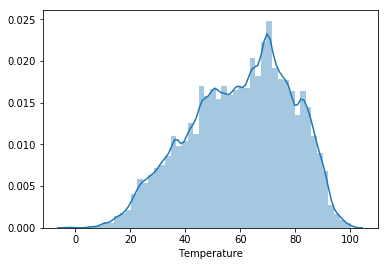

In [21]:
sns.distplot(sales_final['Temperature'])

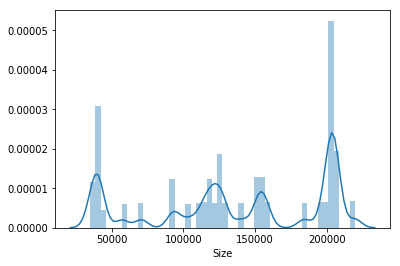

In [22]:
sns.distplot(sales_final['Size'])

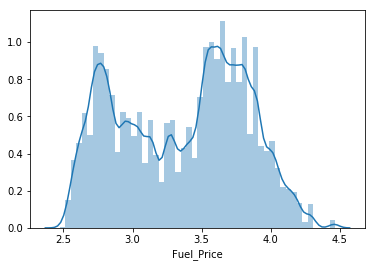

In [23]:
sns.distplot(sales_final['Fuel_Price'])

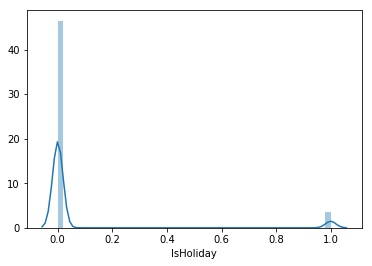

In [24]:
sns.distplot(sales_final['IsHoliday'])

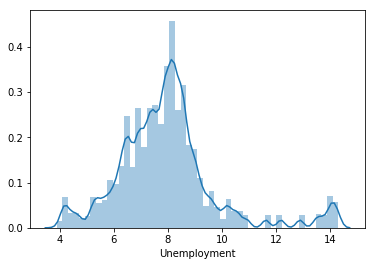

In [25]:
sns.distplot(sales_final['Unemployment'])

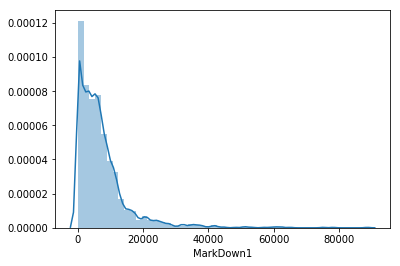

In [26]:
sns.distplot(sales_final['MarkDown1'].dropna())

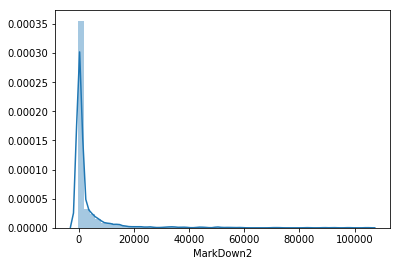

In [27]:
sns.distplot(sales_final['MarkDown2'].dropna())

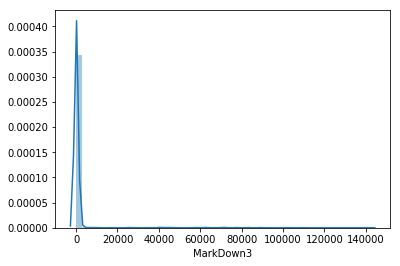

In [28]:
sns.distplot(sales_final['MarkDown3'].dropna())

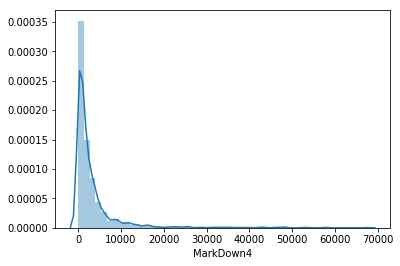

In [29]:
sns.distplot(sales_final['MarkDown4'].dropna())

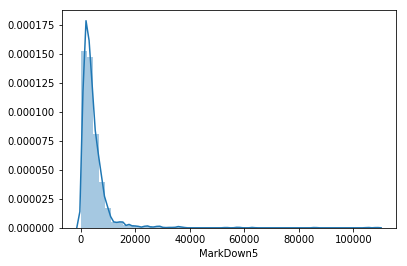

In [30]:
sns.distplot(sales_final['MarkDown5'].dropna())

#### Relationship between numerical features

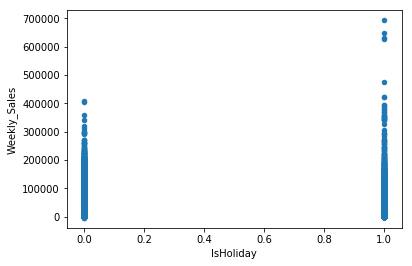

In [31]:
var = 'IsHoliday'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')

##### This might seem a very different plot but it gives us some very useful information. The Weekly Sales hit the roof on holiday weeks and is normally moving on the same curve on non-holiday weeks.

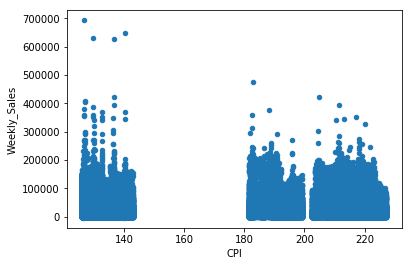

In [32]:
var = 'CPI'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')


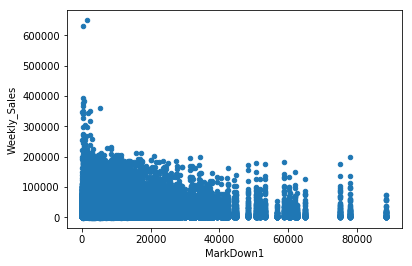

In [33]:
var = 'MarkDown1'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')

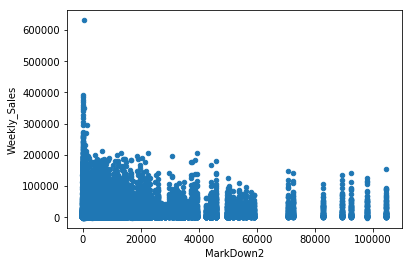

In [34]:
var = 'MarkDown2'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')

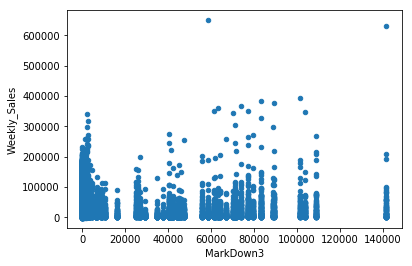

In [35]:
var = 'MarkDown3'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')

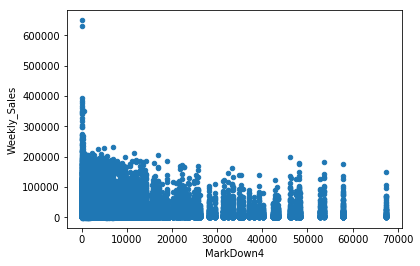

In [36]:
var = 'MarkDown4'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')

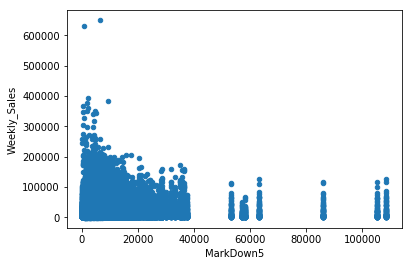

In [37]:
var = 'MarkDown5'
data = pd.concat([sales_final['Weekly_Sales'], sales_final[var]], axis=1)
data.plot.scatter(x=var, y='Weekly_Sales')

#### Correlation Heatmap

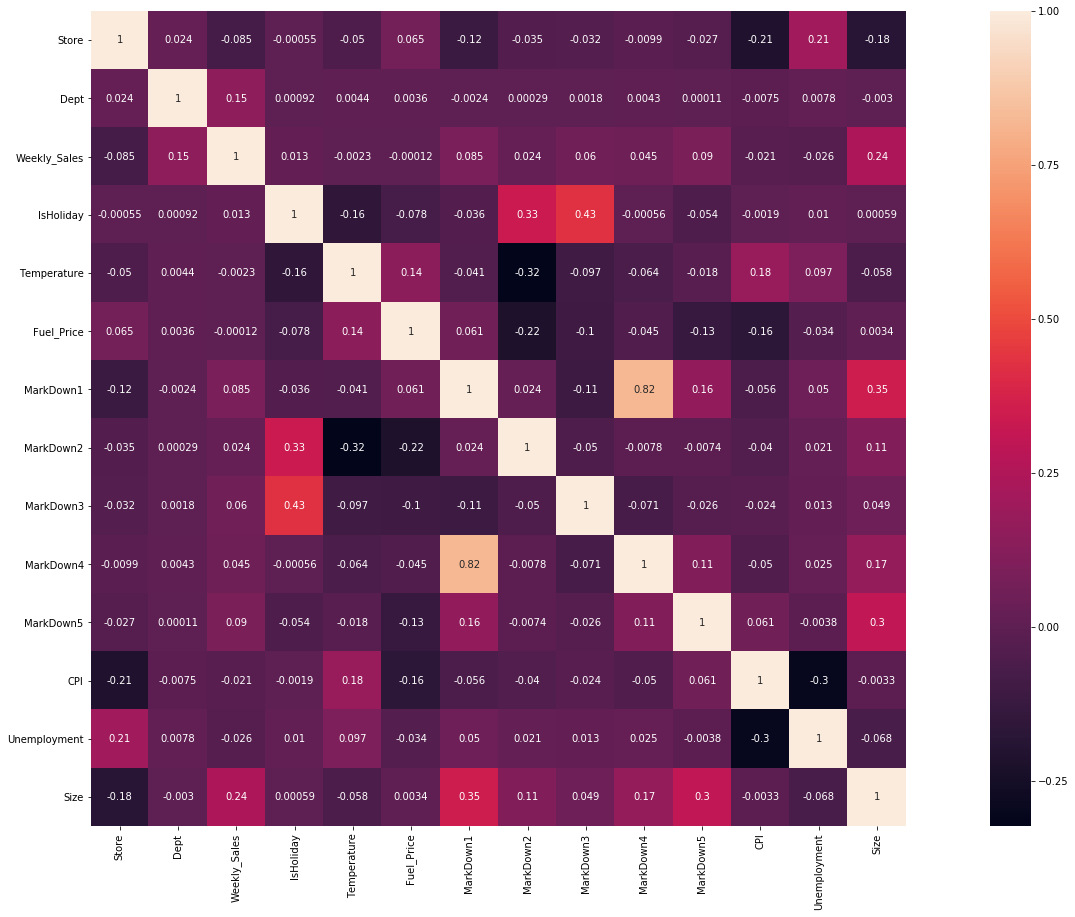

In [38]:
corr_df = sales_final[list(sales_final.columns)].corr()

fig, axes = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_df, square=True, annot=True)

#### Correlation Heatmap - A less insightful version

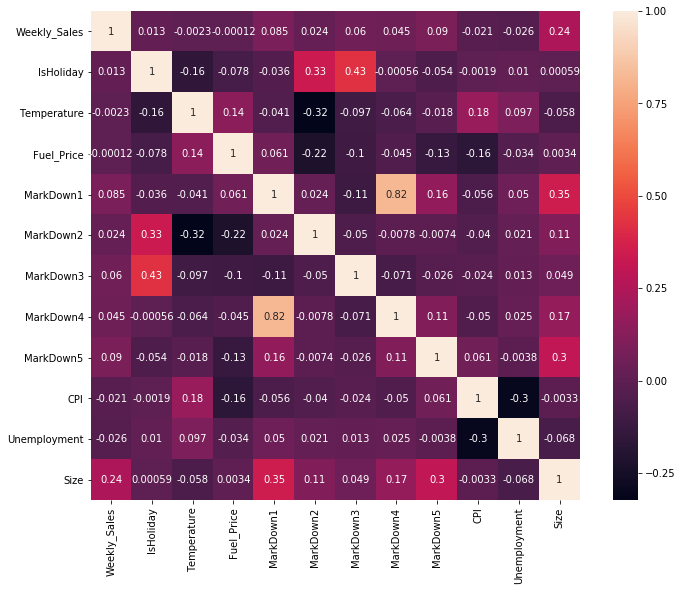

In [39]:
corr_df = sales_final.drop(['Store', 'Dept'], axis=1).corr()

fig, axes = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_df, square=True, annot=True)

#### Observations from the Heatmap

- There seems to be a positive correlation between the IsHoliday and Weekly_Sales.
- Fuel_Price and Temparature seem to have a marginal effect on the sales too.
- All the markdowns have somewhat an effect on sales with MarkDown5 being the most effective.
- CPI, Unemployment also have a effect on sales.
- Size is the most prominent attribute affecting the sales.
- The dependence of MarkDown2 and MarkDown3 on holiday is visible.
- MarkDown1, MarkDown5 also depend on the Size so it can be derived that stores with larger size utilized MarkDown1,5 more.
- There is a strong positive correlation between MarkDown1 and MarkDown4.

#### Correlation Heatmap among different types of stores

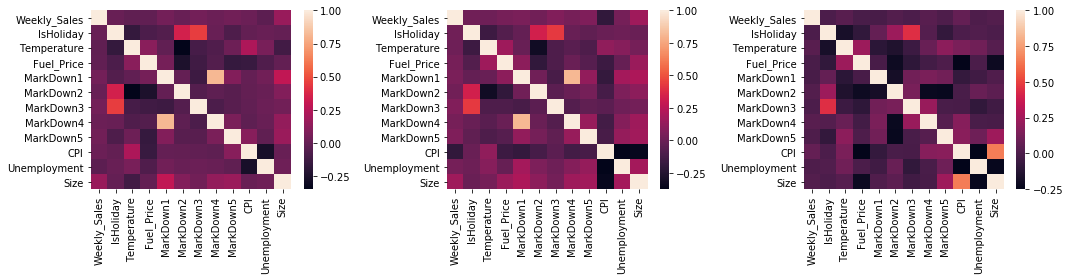

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

data = sales_final.drop(['Store', 'Dept'], axis=1)

sns.heatmap(data[data.Type == 'A'].corr(), ax=axes[0])
sns.heatmap(data[data.Type == 'B'].corr(), ax=axes[1])
sns.heatmap(data[data.Type == 'C'].corr(), ax=axes[2])
plt.tight_layout()


#### Observations

- The heatmaps for Type A and B stores are similar.
- There is a slight difference in Type C store but only marginal.

#### Sales by each deparment per annum

In [41]:
#Adding Year Attribute
sf_temp = sales_final.assign(Year=sales_final.Date.dt.year)

In [42]:
#Summing up the Sales yearly
sales_dept = sf_temp.groupby(by=(['Dept', 'Year']), as_index=False)['Weekly_Sales'].sum()
top_sales = sales_dept.nlargest(50, 'Weekly_Sales')
bottom_sales = sales_dept.nsmallest(50, 'Weekly_Sales')


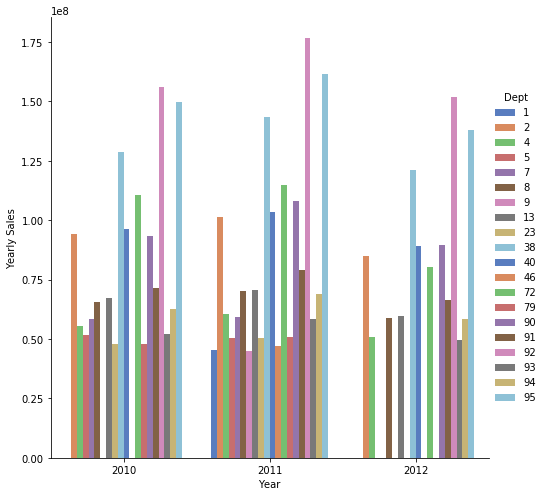

In [43]:
#Top 50 Sales
fp = sns.factorplot(x='Year', y='Weekly_Sales', data=top_sales,
               hue='Dept', size=7, kind='bar', 
               palette='muted'
              )
fp.set_ylabels('Yearly Sales')

#### Analyzing the heatmap of Top Department

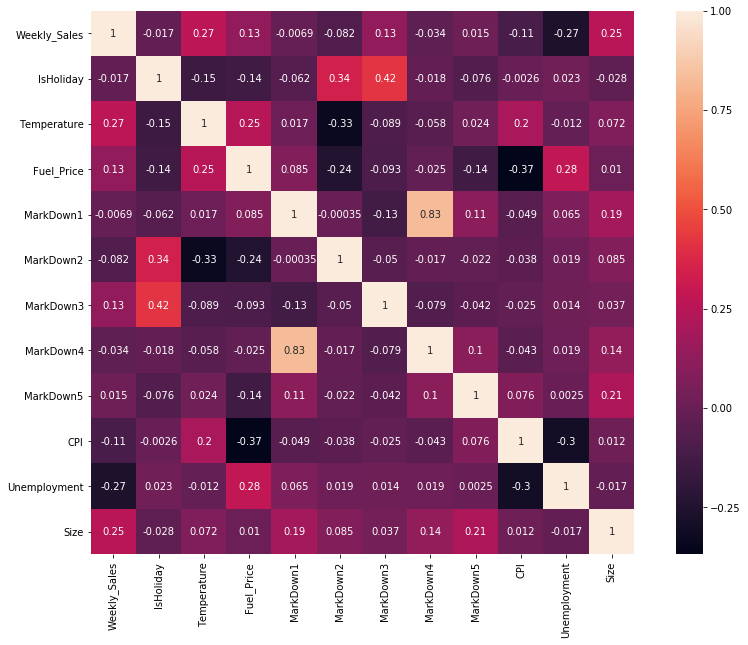

In [115]:
c = sales_final[ (sales_final['Dept'] == 9)].dropna()
c.drop(['Dept', 'Store'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(c.corr(), square=True, annot=True)

- It is quite visible that the department with top sales utilised MarkDown3 the most and MarkDown5 to some extent.
- Interestingly, the size and temperature played a role in affecting sales too.
- Fuel price and Unemployment having a positive correlation is something we have seen previously too.
- MarkDown1,5 having a positive correlation with size, we also saw this in previous observations from heatmap.

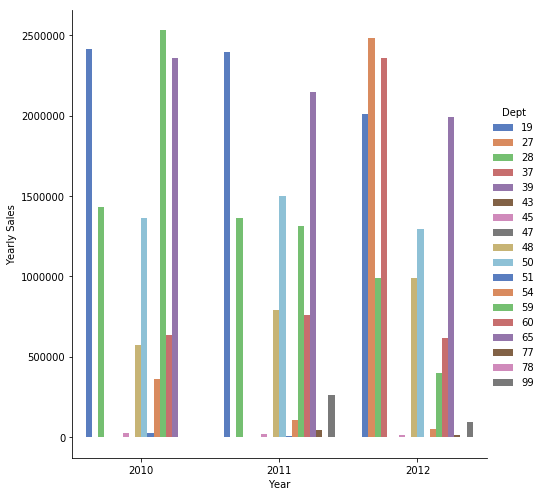

In [44]:
#Bottom 50 Sales
fp = sns.factorplot(x='Year', y='Weekly_Sales', data=bottom_sales,
               hue='Dept', size=7, kind='bar', 
               palette='muted'
              )
fp.set_ylabels('Yearly Sales')

#### Analyzing the heatmap of most Underperforming Department

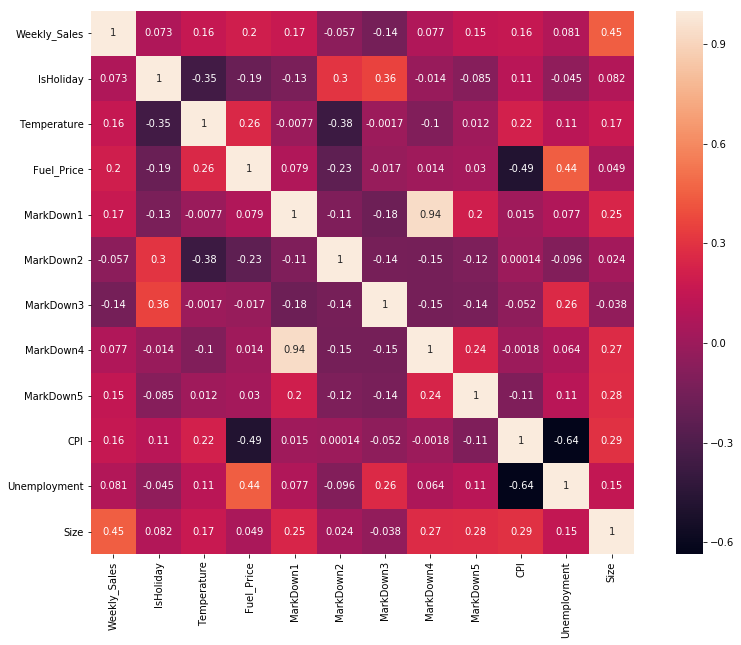

In [150]:
c = sales_final[ (sales_final['Dept'] == 78)].dropna()
c.drop(['Dept', 'Store'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(c.corr(), square=True, annot=True)

- Now this quite interesting...This is the heatmap of department which nearly performed to the ground.
- Sales are affected by almost every factor in a positive way which is shocking. 

#### Sales variation over the time

In [45]:
#Sales variation per annum
avg_sales_year= sf_temp.groupby(by=(['Date']), as_index=False)['Weekly_Sales'].sum()

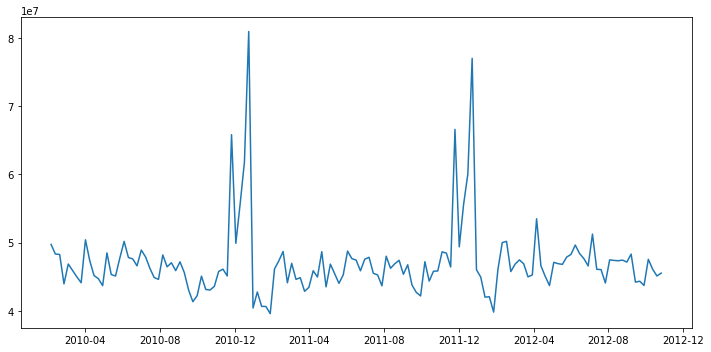

In [46]:
fig, axes = plt.subplots(figsize=(10, 5))
plt.plot(avg_sales_year.Date, avg_sales_year.Weekly_Sales)
plt.tight_layout()

#### Total sales by each store per annum

In [47]:
# Sales by each store
total_sales = sf_temp.groupby(by=(['Store', 'Type']), as_index=False)['Weekly_Sales'].sum()

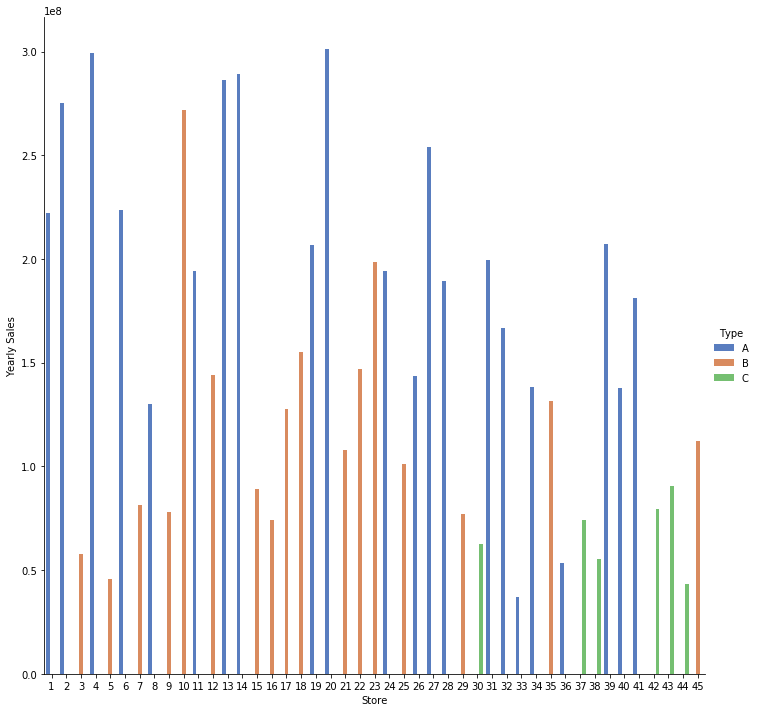

In [48]:
fp = sns.factorplot(x='Store', y='Weekly_Sales', data=total_sales,
               hue='Type', size=10, kind='bar', 
               palette='muted'
              )
fp.set_ylabels('Yearly Sales')

### Monthly Data Distributions by Top 5 Stores

#### Monthly distribution of sales by store#9

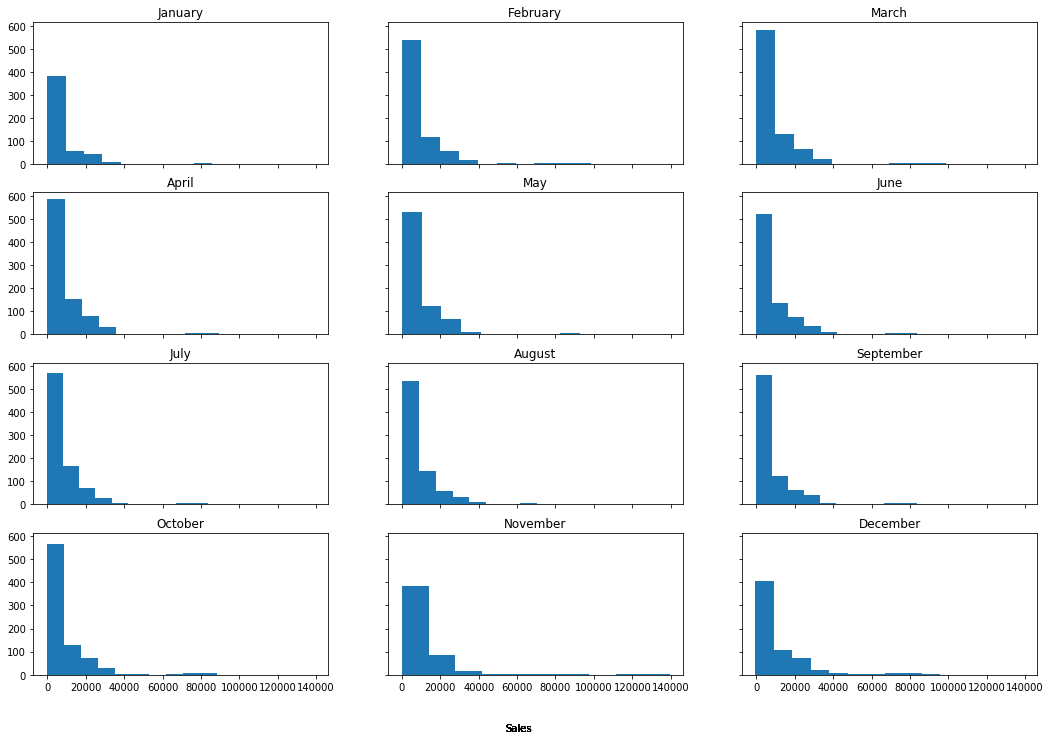

In [125]:
nrows, ncols, store_no, month = 4,3,9,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(18, 12))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.06, 'Sales', ha='center', rotation='horizontal')


#### Monthly distribution of sales by store#38

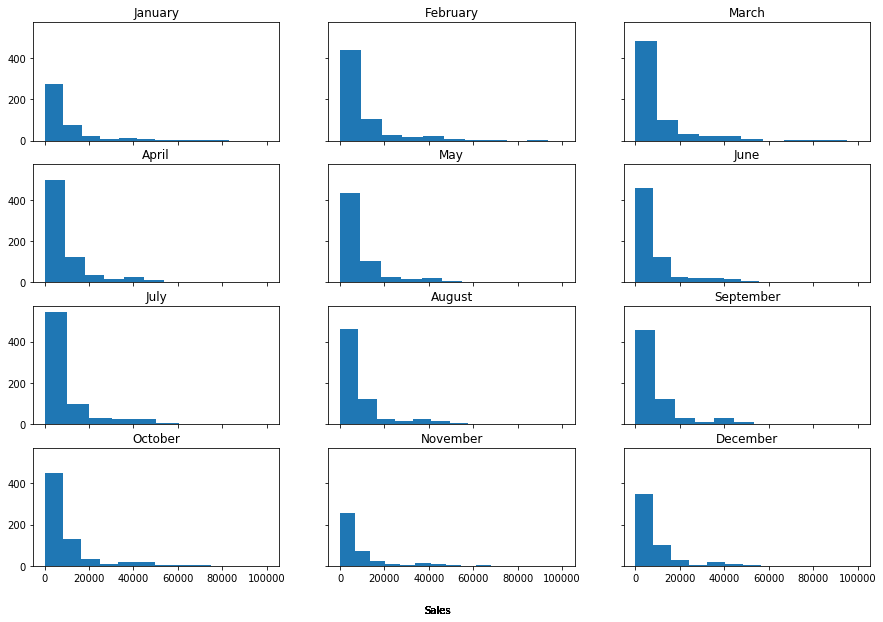

In [117]:
nrows, ncols, store_no, month = 4,3,38,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(15, 10))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.06, 'Sales', ha='center', rotation='horizontal')


#### Monthly distribution of sales by store#2

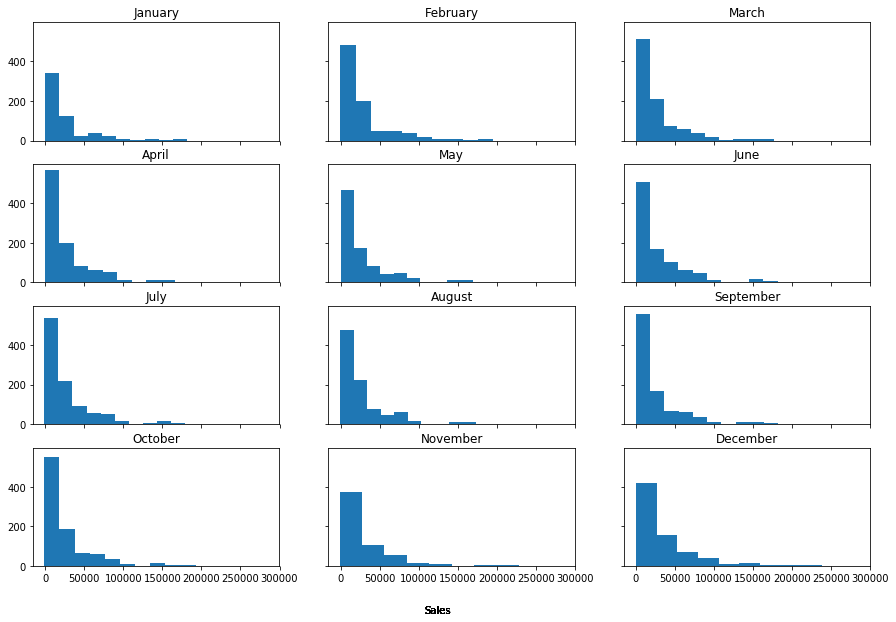

In [120]:
nrows, ncols, store_no, month = 4,3,2,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(15, 10))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.06, 'Sales', ha='center', rotation='horizontal')


#### Monthly distribution of sales by store#1

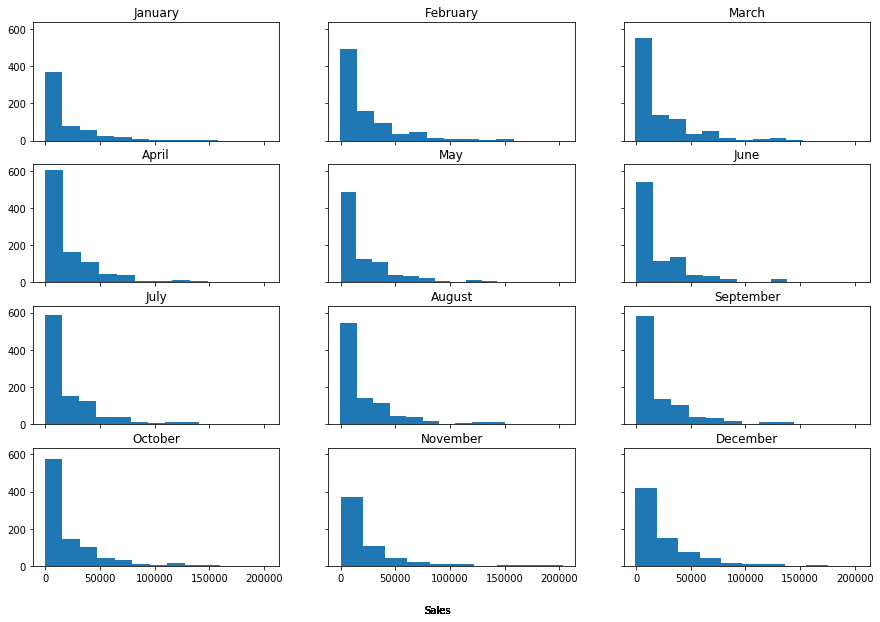

In [121]:
nrows, ncols, store_no, month = 4,3,1,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(15, 10))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.06, 'Sales', ha='center', rotation='horizontal')


#### Monthly distribution of sales by store#7

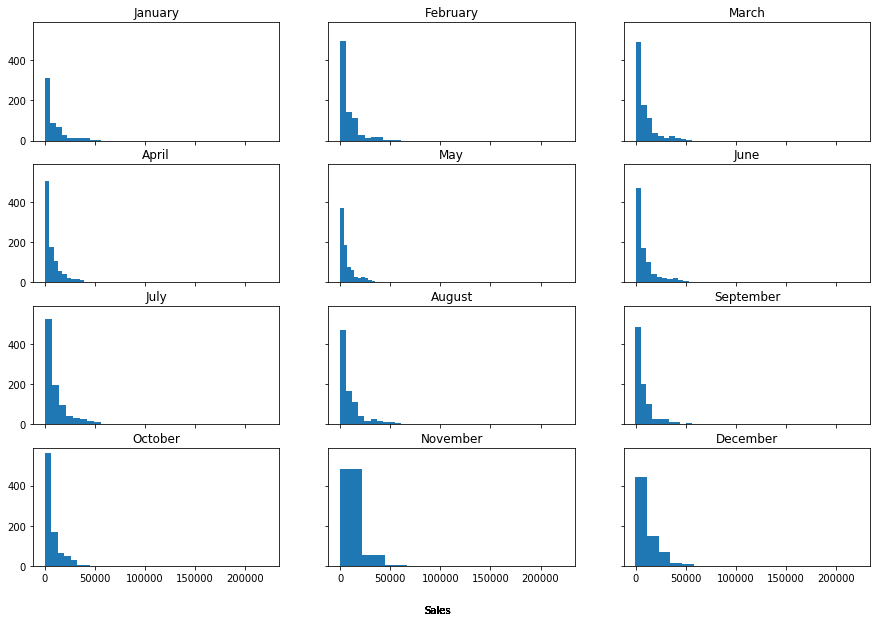

In [53]:
nrows, ncols, store_no, month = 4,3,7,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(15, 10))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.06, 'Sales', ha='center', rotation='horizontal')
        
       # 19,27,28,37,39


### Monthly Data Distributions by Bottom 5 Stores

#### Monthly distribution of sales by store#19

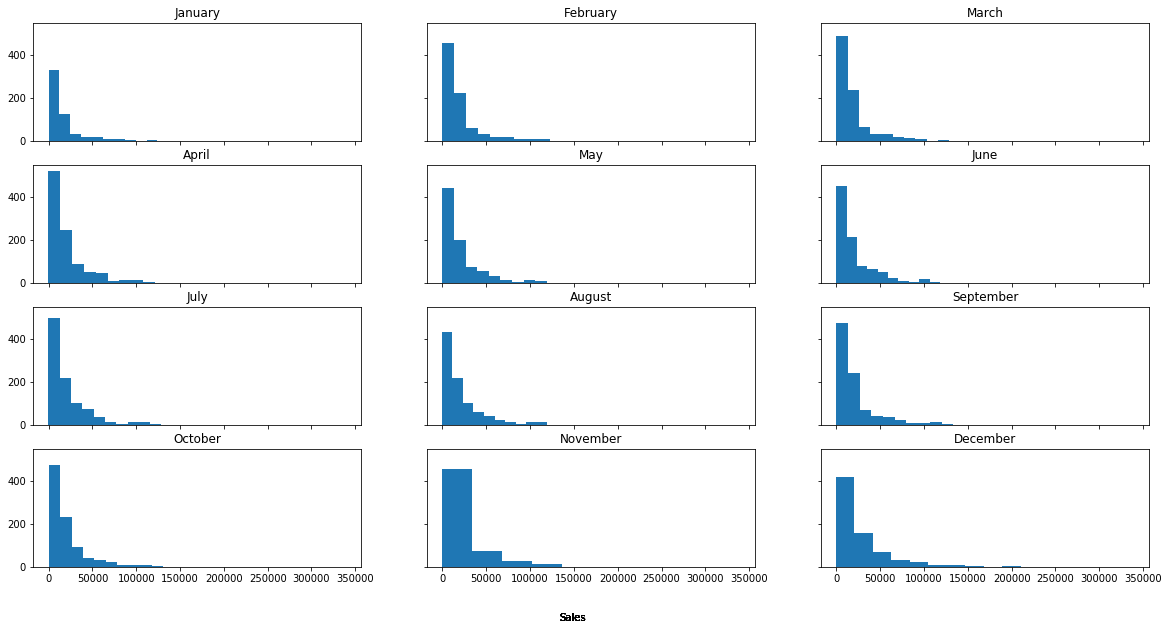

In [137]:
nrows, ncols, store_no, month = 4,3,19,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 10))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.05, 'Sales', ha='center', rotation='horizontal')

#plt.tight_layout()

#### Monthly distribution of sales by store#27

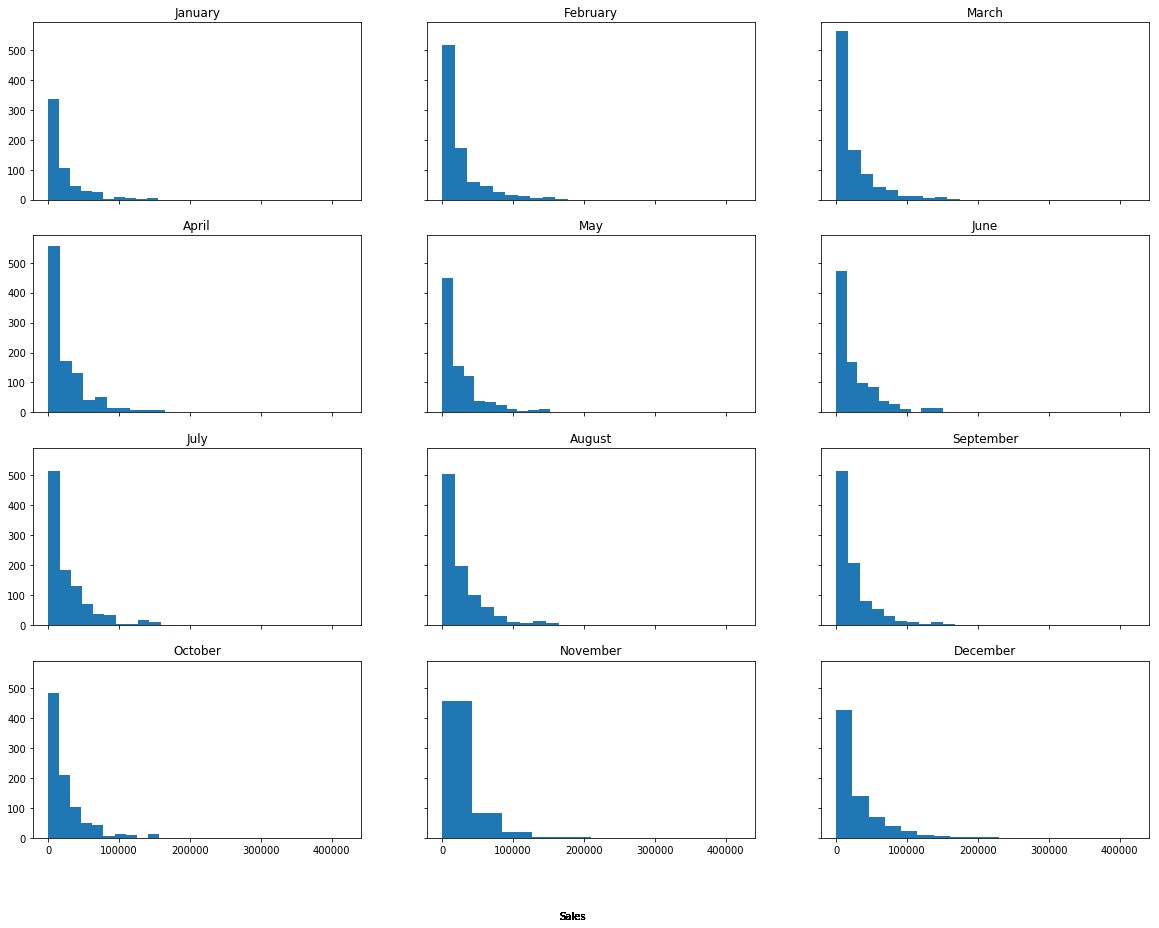

In [72]:
nrows, ncols, store_no, month = 4,3,27,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 15))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.05, 'Sales', ha='center', rotation='horizontal')

#plt.tight_layout()

#### Monthly distribution of sales by store#28

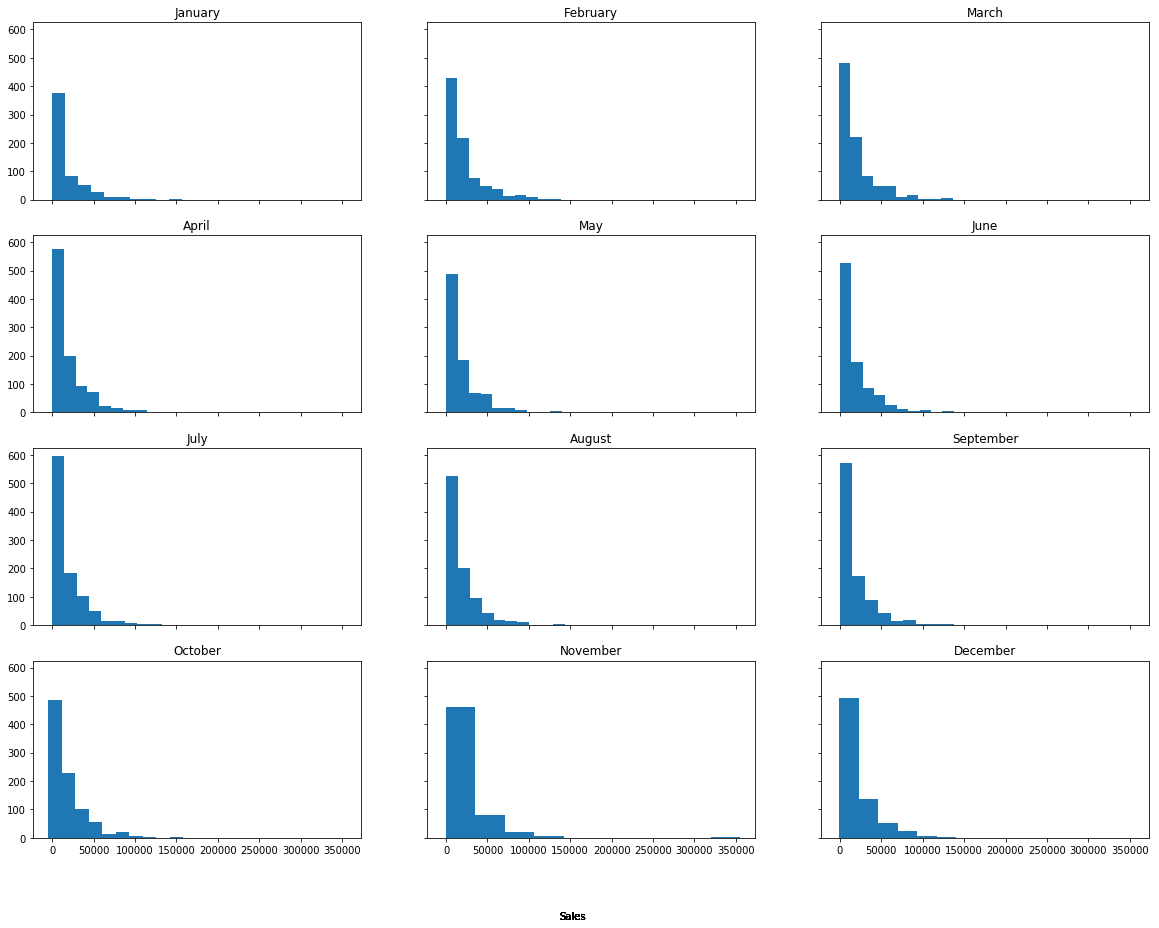

In [73]:
nrows, ncols, store_no, month = 4,3,28,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 15))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.05, 'Sales', ha='center', rotation='horizontal')

#plt.tight_layout()

#### Monthly distribution of sales by store#37

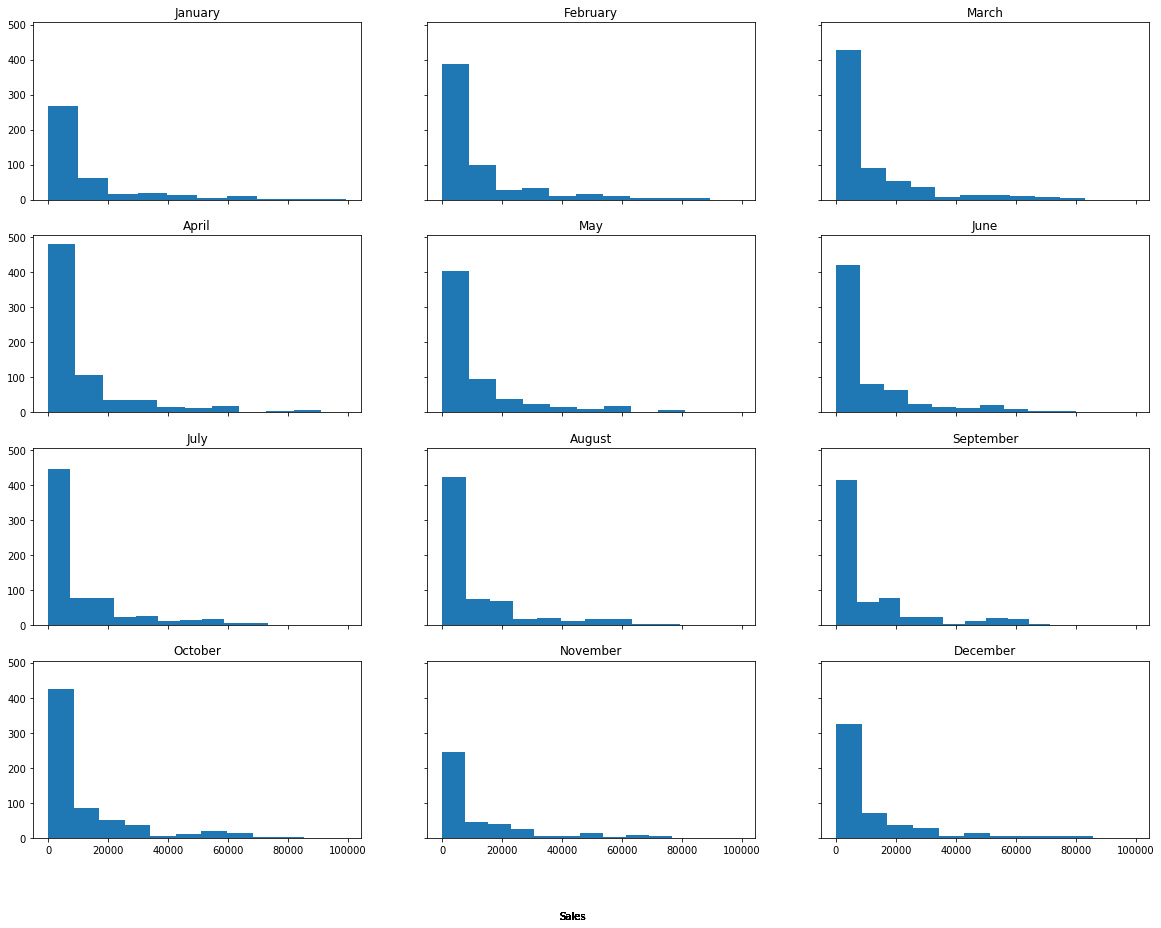

In [74]:
nrows, ncols, store_no, month = 4,3,37,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 15))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.05, 'Sales', ha='center', rotation='horizontal')

#plt.tight_layout()

#### Monthly distribution of sales by store#39

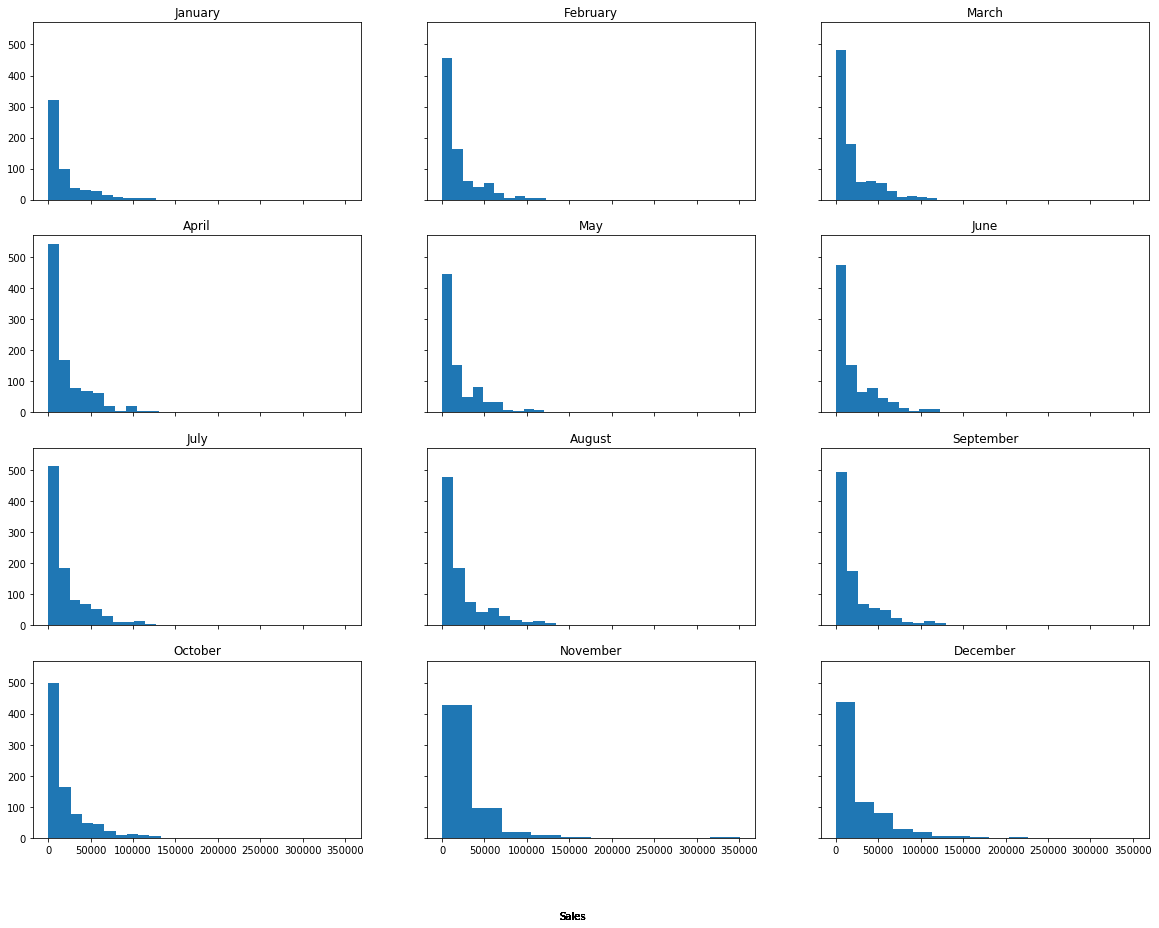

In [75]:
nrows, ncols, store_no, month = 4,3,39,1

fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20, 15))

for r in range(0, nrows):
    for c in range(0, ncols):        
        axes[r,c].hist(sales_final['Weekly_Sales'].loc[(sales_final['Store'] == store_no) & 
                            (sales_final['Date'].dt.month == month)]);

        axes[r,c].set_title(str(calendar.month_name[month]))
        
        month += 1

        fig.text(0.5, 0.05, 'Sales', ha='center', rotation='horizontal')

#plt.tight_layout()

#### How many stores lie in respective size categories? 

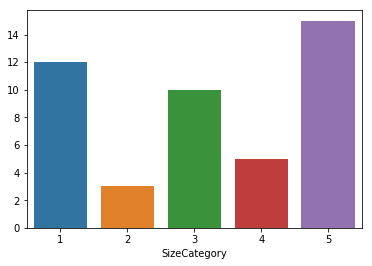

In [54]:
#Adding the SizeCategory
sf_temp['SizeCategory'] = pd.cut(sf_temp['Size'], bins=5, labels=np.arange(1, 6)).astype(np.int)
x = sf_temp.groupby(by=(['SizeCategory']))['Store'].nunique()
sns.barplot(x=x.index,y=x.values)